### Import packages

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import splrep, BSpline

### Set Path

In [2]:
cd '/home/kaixin/Downloads/dircap_new'


/home/kaixin/Downloads/dircap_new


In [3]:
if (os.path.exists('output')==False):
    os.mkdir('output')
run_dircap=True
print_wavefunc=False
Start_E=0.028
Truncate_E=1.508
if print_wavefunc:
    outputfolder='./output_zs_wf/'
else:
    outputfolder='./output_zs/'

### Define Input Variables

In [4]:
Title="23Na+p:1st"
AT=22.989
ZT=11
AP=1.007276
ZP=1
Q=11.69269 # MeV
Ex=11.390 # MeV
WS_r=1.25			# WS radius parameter ***  1.25
WS_a=0.65 		    # WS diffuseness *** 0.65
# HS_r=1.25			# HS radius parameter ***  1.25
HS_r=0             # For zero scattering potential
JP=0.5             # JP
JT=1.5             # JT
JF=1             # JF ***
LF=1             # LF ***
NR=2.0		    	# NR Number of nodes, including origin ***
LI=1.0             # LI 
Mult="E1"              # Multipolarity (E1, E2, M1)
Nstep=5000			# No. of steps 
StepSize=0.1             # Step size (fm)
if print_wavefunc:
    StepPrint=1.0             # if nonzero print wavefunctions at these steps
else:
    StepPrint=0
E_unit=0               # (0,1) for energies in (cm,lab) 
read_E=0               # read energies from external file (no=0,yes=1)
E_start=0.008  		    # Start energy (MeV)
E_step=0.01			# Energy step size (MeV)
E_number=250             # Number of energies 

WriteList=(Title,AT,ZT,AP,ZP,Q,Ex,WS_r,WS_a,HS_r,JP,JT,JF,LF,NR,LI,Mult,Nstep,StepSize,StepPrint,E_unit,read_E,E_start,E_step,E_number)
formatting=''
for i in range(0,len(WriteList)):
    formatting=formatting+'%s\n'

### Update inputs from external file and run multiple times

In [5]:
input_list=pd.read_csv('dc_list',delim_whitespace=True)
outfile_names=[]
for i in range(0,len(input_list)):
    outfile_name=''
    for v in input_list.columns:
        globals()[v]=input_list[v][i]  # find the defined variable from the input variable list to be updated 
        outfile_name=outfile_name+'%s'%globals()[v]+'_' # define output filename for this run
    outfile_name = outfile_name[:-1]
    outfile_names.append(outfile_name)
    WriteList=(Title,AT,ZT,AP,ZP,Q,Ex,WS_r,WS_a,HS_r,JP,JT,JF,LF,NR,LI,Mult,Nstep,StepSize,StepPrint,E_unit,read_E,E_start,E_step,E_number)
    if (run_dircap):
        print('Ex=',Ex,' NR=',NR,' LI=',LI)
        with open("dircap.in","w+") as outfile: # create input file for dircap code
            outfile.write(formatting % WriteList) 
        os.system('./dircap') # run dircap
#         os.system('cp '+'dircap.out '+'./output/'+outfile_name)
        os.system('cp '+'dircap.out '+outputfolder+outfile_name)
os.system('cp '+'dc_list '+outputfolder)
os.system('cp '+'levels '+outputfolder)


Ex= 0.0  NR= 1  LI= 1

 Direct Capture for Woods-Saxon potential. Version 4.0

 Careful with angular momentum coupling! Code
 returns finite values for non-physical
 combinations of ell_i and ell_f




/tmp/ipykernel_345181/3206090568.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  input_list=pd.read_csv('dc_list',delim_whitespace=True)


Ex= 0.0  NR= 1  LI= 3

 Direct Capture for Woods-Saxon potential. Version 4.0

 Careful with angular momentum coupling! Code
 returns finite values for non-physical
 combinations of ell_i and ell_f


Ex= 1.369  NR= 2  LI= 1

 Direct Capture for Woods-Saxon potential. Version 4.0

 Careful with angular momentum coupling! Code
 returns finite values for non-physical
 combinations of ell_i and ell_f


Ex= 1.369  NR= 1  LI= 1

 Direct Capture for Woods-Saxon potential. Version 4.0

 Careful with angular momentum coupling! Code
 returns finite values for non-physical
 combinations of ell_i and ell_f


Ex= 1.369  NR= 1  LI= 3

 Direct Capture for Woods-Saxon potential. Version 4.0

 Careful with angular momentum coupling! Code
 returns finite values for non-physical
 combinations of ell_i and ell_f


Ex= 4.123  NR= 1  LI= 1

 Direct Capture for Woods-Saxon potential. Version 4.0

 Careful with angular momentum coupling! Code
 returns finite values for non-physical
 combinations of ell_i and 

0

### Read output files

In [6]:
levels=pd.read_csv('levels',delim_whitespace=True)
Ex_index=input_list.columns.tolist().index('Ex')
LF_index=input_list.columns.tolist().index('LF')
LI_index=input_list.columns.tolist().index('LI')
# summed_S_coef=np.array([0,0,0]) # summed S(0),S'(0),S''(0) coefficients multiplied by C2S for each run.
summed_S_coef=np.arange(Start_E,Truncate_E,0.01)*0
listofsummed_S_coef=[]
listoflevel=[]
listofSvalue=[]
summed_S=None
with open("./output_zs/S_coefficients","w+") as outfile:
    outfile.write('\t'.join(str(value) for value in ['filename','1/2S\'\'(0)','S\'(0)','S(0)','Error']))
    outfile.write('\n')
    print('level','maximum of S(E)','C2S')
    for filename in outfile_names:
#         if float(filename[0:5])<7: # filter based on energy
#             continue
        data=pd.read_csv('./output_zs/'+filename,skiprows=24,delim_whitespace=True,names=["E","Sigma","S","S/b^2",'Phase'])
        E=data["E"].to_numpy().tolist()
        E=E[E.index(Start_E):E.index(Truncate_E)]
        S=data["S"].to_numpy().tolist()[0:len(E)] 
        data=levels.loc[(levels['Level'] == 1000*float(filename.split('_')[Ex_index])) \
                        & (levels['lf'] == float(filename.split('_')[LF_index]))\
                        ]
        for i in range (0,len(S)):
            S[i]=S[i]*data['C2S_MCMC'].values[0]
#             S[i]=S[i]*1000 # Convert the unit from Mev.barn to keV.barn! 

        if summed_S is None:
            summed_S=np.array(S)
        else:
            summed_S=summed_S+np.array(S)
#         Using 2nd order polynomial to fit. 
#         trend = np.polyfit(E,S,2)
#         trendpoly = np.poly1d(trend)  
#         Using smoothing interpolation. 
        tck = splrep(E, S, s=len(E))
        # Search for C2S by level energy and lf. Note that the unit should be converted from MeV.b 
        # to keV.b for RattesMC code, multiply by 1000.
#         data=levels.loc[(levels['Level'] == float(filename.split('_')[Ex_index])) & (levels['lf'] == float(filename.split('_')[LF_index]))]
#         summed_S=summed_S+data['(2J+1)C2S*2/3_MCMC'].values*trend

#  Old dircap code
#         summed_S_coef=summed_S_coef+trendpoly
#         listofsummed_S_coef.append(trendpoly)
        xrange=np.arange(Start_E, Truncate_E, 0.01)
        SmoothFit=BSpline(*tck)(xrange)
        summed_S_coef=summed_S_coef+SmoothFit
        listofsummed_S_coef.append(SmoothFit)
        
        listoflevel.append(str(data['Level'].values[0])+'keV')
        listofSvalue.append(max(S))
        outfile.write(filename)
        outfile.write('\t')
#         outfile.writelines('\t'.join(str(value) for value in list(trend)))
#         outfile.write('\t')
#         outfile.write(str(max(abs(trendpoly(E)-S)/S)))
#         outfile.write('\n')
        print(filename[0:6],max(S),data['C2S_MCMC'].values[0])

level maximum of S(E) C2S
0.0_2_ 0.00043855322 0.0574
0.0_2_ 2.8732718e-06 0.0574
1.369_ 0.0002300628 0.0066
1.369_ 0.0017976105 0.2681
1.369_ 1.3602321599999999e-05 0.2681
4.123_ 0.00010403233999999999 0.0118
4.123_ 1.1271006e-06 0.0118
4.238_ 0.0005562098 0.0197
4.238_ 0.0004578114 0.0951
4.238_ 5.0471472000000005e-06 0.0951
5.235_ 0.00032695023999999997 0.0556
5.235_ 4.251120399999999e-06 0.0556
6.011_ 2.41758e-05 0.0036
6.011_ 3.63636e-07 0.0036
7.349_ 9.988440000000001e-05 0.0047
7.349_ 6.444680000000001e-06 0.0022
7.349_ 1.3069980000000001e-07 0.0022
7.555_ 1.7099099999999997e-05 0.0009
7.555_ 1.1726999999999998e-06 0.0009
7.747_ 0.0004059032 0.0332
7.747_ 7.427164e-05 0.0457
7.747_ 1.6722087e-06 0.0457
8.358_ 0.00033339599999999996 0.009
8.358_ 2.67975e-05 0.009
8.437_ 0.00026598375 0.0639
8.437_ 7.336358999999999e-06 0.0639
8.437_ 0.0008582376000000001 0.0551
8.437_ 7.018087e-05 0.0551
8.654_ 0.00043102670000000007 0.0233
8.654_ 4.977883e-05 0.0227
8.654_ 1.4738656000000001e-06

/tmp/ipykernel_345181/470425391.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  levels=pd.read_csv('levels',delim_whitespace=True)
/tmp/ipykernel_345181/470425391.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data=pd.read_csv('./output_zs/'+filename,skiprows=24,delim_whitespace=True,names=["E","Sigma","S","S/b^2",'Phase'])
/tmp/ipykernel_345181/470425391.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data=pd.read_csv('./output_zs/'+filename,skiprows=24,delim_whitespace=True,names=["E","Sigma","S","S/b^2",'Phase'])
/tmp/ipykernel_345181/470425391.py:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+

In [7]:
0.0004059032/(7.427164e-05+1.6722087e-06)

5.344780478580091

In [8]:
# [x for _,x in sorted(zip(listofSvalue,listofsummed_S_coef))]

In [18]:
Label_selected = [x for _,x in sorted(zip(listofSvalue,listoflevel))][-11:]
Label_selected.reverse()
# Label_selected=Label_selected[0:]

S_coef_selected = [x for _,x in sorted(zip(listofSvalue,listofsummed_S_coef))][-11:]
# S_coef_selected = S_coef_selected[0:]
S_coef_selected.reverse()
# delete repeated label for 4238keV
del Label_selected[-3]
del S_coef_selected[-3]
print(Label_selected)
# Label_selected[0]='10731keV'
for i in range(0,len(Label_selected)):
#     S_coef_selected[i]=np.array([0,0,0])
    S_coef_selected[i]=np.arange(Start_E, Truncate_E, 0.01)*0
    for j in range(0,len(listoflevel)):
        if (Label_selected[i]==listoflevel[j]):
#             print(listoflevel[j],S_coef_selected[i],listofsummed_S_coef[j])
            S_coef_selected[i]=S_coef_selected[i]+listofsummed_S_coef[j]

['1369keV', '8864keV', '10731keV', '10712keV', '8437keV', '11453keV', '11518keV', '4238keV', '10059keV', '0keV']


In [10]:
# print(E[40],summed_S[40])

In [11]:
# plt.scatter(E,summed_S,marker='.',color='red')
# trendpoly = np.poly1d(summed_S_coef)  
# plt.plot(E,trendpoly(E),color='b')
# plt.show()
# plt.scatter(E,abs(trendpoly(E)-summed_S)/summed_S,color='b',marker='.')
# plt.show()

In [12]:
# trend
# x=np.linspace(0.1,1.5,50)
# y=trend[0]*x**2+trend[1]*x+trend[2]
# plt.plot(x,y)
# print(trend)
# print(trend[2]*1000,trend[1],trend[0]*2/1000)

13.05249249599857 -0.0017908563113427816 1.6170976694811232e-06
[   0    8   18   28   38   48   98  148  198  298  398  498  598  798
  998 1498 1998 2498]
[13.05 13.04 13.02 13.00 12.99 12.97 12.88 12.81 12.73 12.59 12.47 12.36
 12.27 12.14 12.07 12.18 12.70 13.62]


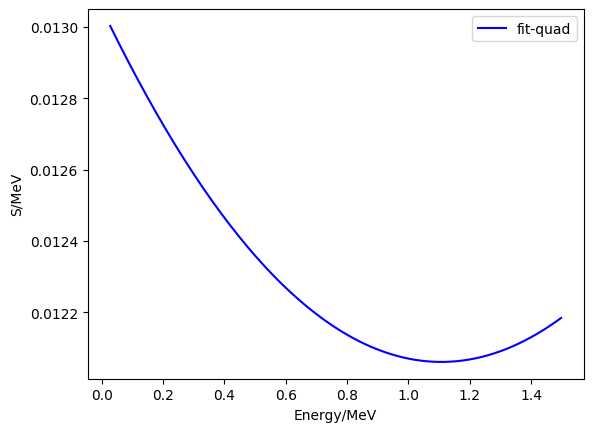

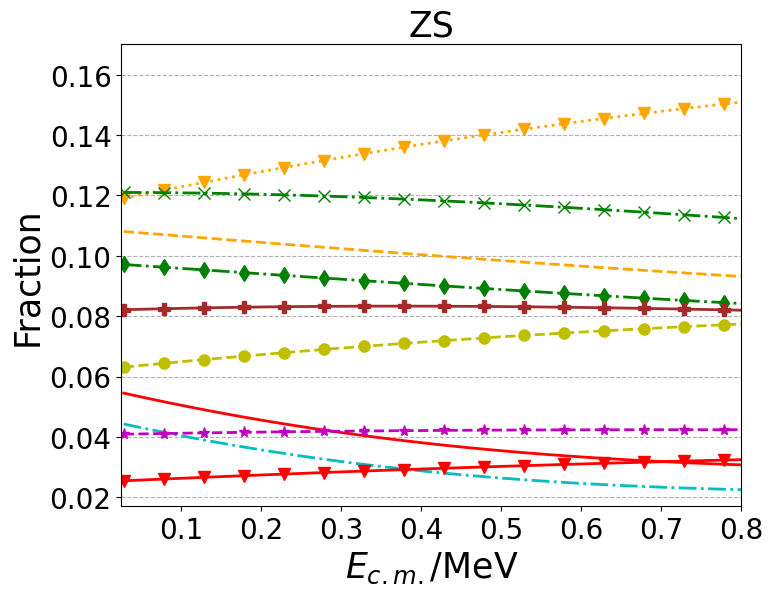

In [13]:
# ###### trendpoly = np.poly1d(summed_S_coef)  
# # E=E[0:99]
# # summed_S=summed_S[0:99]
# plt.title('My DC S-factor')
# plt.scatter(E,summed_S,marker='.',color='red',label='S-factor')
trend = np.polyfit(E,summed_S,2)
trendpoly = np.poly1d(trend)  
print(trend[2]*1000,trend[1],trend[0]*2/1000)
Es=np.array([0,8,18,28,38,48,98,148,198,298,398,498,598,798,998,1498,1998,2498])
print(Es)
with np.printoptions(formatter={'float': '{:.2f}'.format}):
    print(1000*trendpoly(Es/1000))
plt.plot(E,trendpoly(E),color='b',label='fit-quad')
# plt.plot(E,summed_S_coef,color='b',label='fit-quad')
plt.xlabel('Energy/MeV')
plt.ylabel('S/MeV')
plt.legend()
plt.show()
# plt.scatter(E,abs(trendpoly(E)-summed_S)/summed_S,color='b',marker='.')
# plt.show()
# plt.savefig('MySfactor_10059-11518.png')
# plt.show()

# trendpoly2= np.poly1d([1/2*6.42e-3, -7.31e-3, 2.48e-2]) # Coefficients from RatesMC input,
#                                                  #converted to MeV barn.
# # trendpoly2= np.poly1d([0.00257,-0.00693,0.0239]) # From Hale.(2004)
# plt.scatter(E,trendpoly2(E),marker='.',color='orange')
# plt.title('DC S-factor from RatesMC input (Hale04)')
# # plt.savefig('RatesMC.png')
# plt.show()
# plt.scatter(E,trendpoly(E)/trendpoly2(E),marker='.')
# plt.title('Ratio')
# plt.show()
fig, ax = plt.subplots(figsize=(8, 6))
# plt.title('Fractional contributions to the total DC S-factor (ZS)',fontsize=22)
plt.title('ZS',fontsize=25)
plt.xlabel('$E_{c.m.}$/MeV',fontsize=25)
plt.ylabel('Fraction',fontsize=25)
# plt.xticks(np.arange(0.08,0.25,0.04),fontsize=20)
# plt.yticks(np.arange(0.02,0.17,0.02),fontsize=20)
# plt.ylim(0.017,0.15)
# Eend=17  //format to compare with notre dame paper
plt.xticks(np.arange(0.1,0.81,0.1),fontsize=20)
plt.yticks(np.arange(0.02,0.20,0.02),fontsize=20)
plt.ylim(0.017,0.17)
plt.xlim(0.025,0.8)
Eend=80
linestyles=[':','-.','--','-.','-','-','-.','--','--','-']
markers=['v','x',None,'d','P',None,None,'o','*','v']
colors=['orange','g','orange','g','brown','red','c','y','m','red']

for i in range(0,len(S_coef_selected)):
#     trendpoly = np.poly1d(S_coef_selected[i])  
#     plt.plot(E[0:Eend],trendpoly(E)[0:Eend]/poly_S_tot(E)[0:Eend],linewidth=3,markersize=8,\
#              label=Label_selected[i],linestyle=linestyles[i],marker=markers[i]\
#              ,color=colors[i]
#             )
    plt.plot(E[0:Eend],S_coef_selected[i][0:Eend]/summed_S_coef[0:Eend],linewidth=2,markersize=8,\
             label=Label_selected[i],linestyle=linestyles[i],marker=markers[i]\
             ,color=colors[i],markevery=5
            )
handles, labels = plt.gca().get_legend_handles_labels()
order = [0,1,2,3,4,5,6,7,8,9]
# order = [0,1,2,7,3,5,4,8,9,6]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],bbox_to_anchor=(1, 1), fontsize=15,ncol=1,loc='upper left') 

# plt.legend()
plt.grid(which='major', axis='y',linestyle='--')
# plt.legend(ncol=2)

In [14]:
data=levels.loc[(levels['Level'] == float(filename.split('_')[Ex_index])) \
                        & (levels['lf'] == float(filename.split('_')[LF_index]))\
                        ]

In [15]:
(0.03720481602579003/np.sqrt(2), 0.7099829024501909/np.sqrt(2))

(0.026307777704634067, 0.5020337248490371)

In [16]:
(0.2236879430379645/np.sqrt(2), 0.6846843262687741/np.sqrt(2))

(0.15817126139181487, 0.4841449300767927)

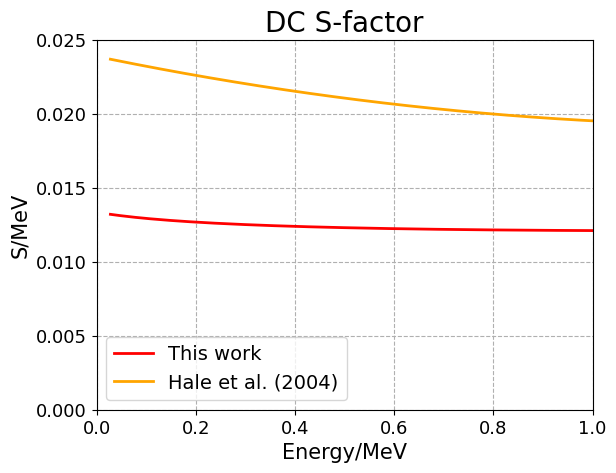

In [17]:
trendpoly = np.poly1d(summed_S_coef)  
plt.title('DC S-factor',fontsize=20)
plt.plot(E,summed_S,color='red',label='This work',linewidth=2)
trendpoly = np.poly1d(summed_S_coef)  
plt.xlabel('Energy/MeV',fontsize=15)
plt.ylabel('S/MeV',fontsize=15)
trendpoly2= np.poly1d([2.57e-3, -6.93e-3, 2.39e-2]) # Coefficients from Hale
plt.plot(E,trendpoly2(E),color='orange',label='Hale et al. (2004)',linewidth=2)
# plt.savefig('RatesMC.png')
plt.ylim(0,0.025)
plt.xlim(0,1)
plt.legend(fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(which='major', axis='both',linestyle='--')
plt.show()


## Make an input file for dircapMulti